In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

from walker import create_context_map, next_step_proposal, plot_trajectory, sample_next_step

# Examples of how the code works

The walker code works in the following way:

The function `next_step_proposal` to creates a map of the probability of ending up in any position, given the current position, some map parameters, and the size of the map

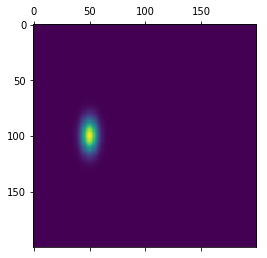

In [2]:
proposal = next_step_proposal(current_i=100, current_j=50, sigma_i=10, sigma_j=5, size=200)
plt.matshow(proposal)

The function `create_context_map` creates a context map that tell us regions in the image with a higher probability of being looked at (e.g., very bright spots in an image)

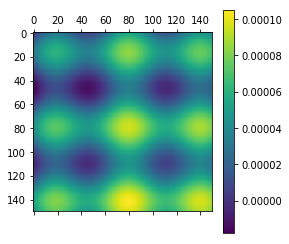

In [3]:
context_map = create_context_map(size=150, map_type='hills')
plt.matshow(context_map)
plt.colorbar()

The function `sample_next_step` calls `next_step_proposal`, combines it with the context map that is passed to it (in `compute_next_step_probability`), and then stochastically selects the next step.

# How to simulate a trajectory

in order to use the walker, the user has to create a context map. Then, for a number of timesteps, sample a step, always passing along the new position information.

In [4]:
i, j = 100, 50  # initial position
sigma_i, sigma_j = 3, 4  # parameters of the next step map
size = 200  # size of the image
context_map = create_context_map(size, 'hills')  # fixed context map

# Sample a next step 1000 times
trajectory = []
for _ in range(1000):
    i, j = sample_next_step(i, j, sigma_i, sigma_j, context_map)
    trajectory.append((i, j))

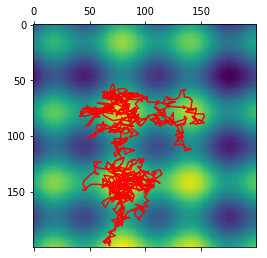

In [5]:
plot_trajectory(trajectory, context_map)
